In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("data.csv")
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [2]:
df = pd.read_csv('data.csv', usecols=['price', 'sqft_living'])
#Convert square foots to square meters
df['sq_meter'] = df['sqft_living']/10.764
#Reduce decimals
df['price'] = df['price'].round(2)
df['sq_meter'] = df['sq_meter'].round(2)
df = df.drop(columns='sqft_living') 
df.head()

,price,sq_meter
0,313000.0,124.49
1,2384000.0,339.09
2,342000.0,179.30
3,420000.0,185.80
4,550000.0,180.23


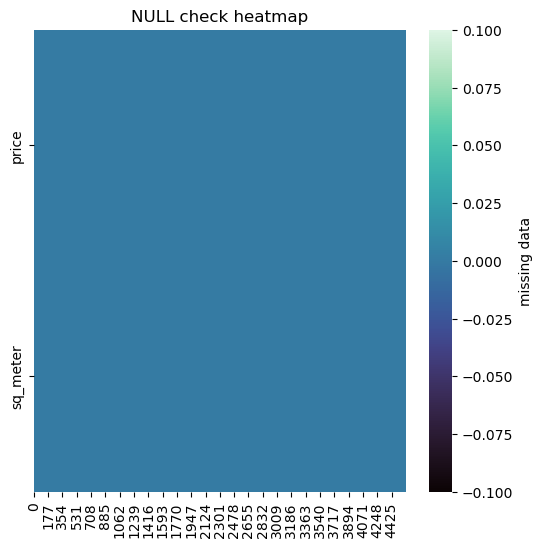

In [4]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isna().transpose(), cmap = "mako", cbar_kws = {"label":"missing data"})
plt.title('NULL check heatmap')
plt.show()

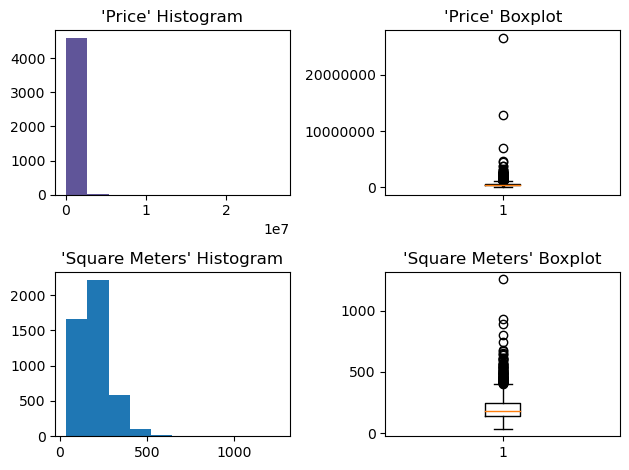

In [5]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['price'], color='#1C0D6E', alpha=0.7)
axs[0, 0].set_title("'Price' Histogram")

axs[0, 1].boxplot(df['price'])
axs[0, 1].set_title("'Price' Boxplot")
axs[0, 1].ticklabel_format(style='plain', axis='y')

axs[1, 0].hist(df['sq_meter'])
axs[1, 0].set_title("'Square Meters' Histogram")

axs[1, 1].boxplot(df['sq_meter'])
axs[1, 1].set_title("'Square Meters' Boxplot")

fig.tight_layout()
plt.show()

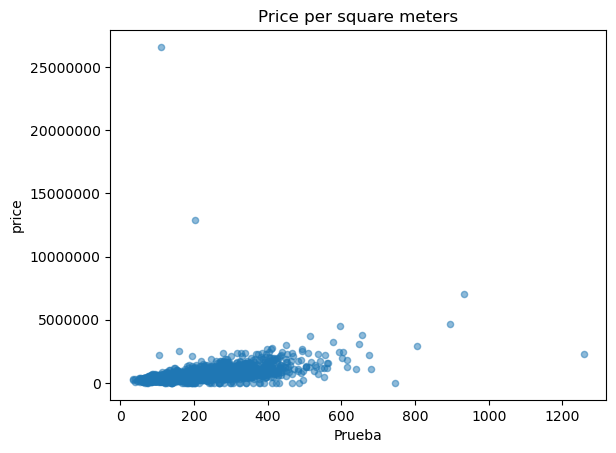

In [6]:
df.plot(x='sq_meter', y='price', kind='scatter', alpha=0.5)
plt.title('Price per square meters')
plt.xlabel('Prueba')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

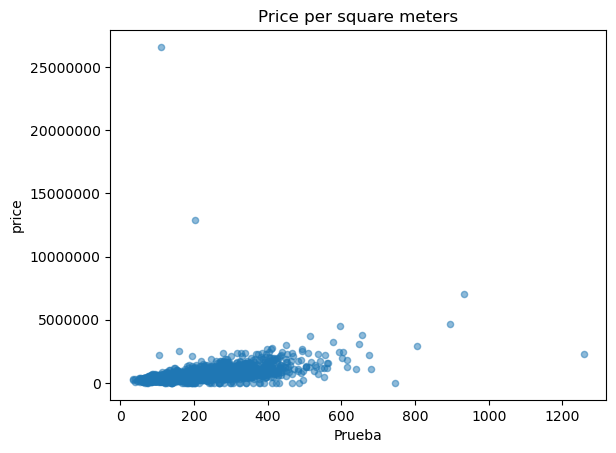

In [7]:
df.plot(x='sq_meter', y='price', kind='scatter', alpha=0.5)
plt.title('Price per square meters')
plt.xlabel('Prueba')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [25]:
training = df.sample(frac=0.7, random_state=25)
test = df.drop(training.index)

print(f'Number of training dataset: {training.shape[0]}')
print(f'Number of training dataset: {test.shape[0]}')

x_train = np.array(training['sq_meter']).reshape(-1, 1)
y_train = np.array(training['price']).reshape(-1, 1)

Number of training dataset: 3220
Number of training dataset: 1380


In [26]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [27]:
test['price_predicted'] = reg.predict(np.array(test['sq_meter']).reshape(-1,1))

test.head()

,price,sq_meter,price_predicted
0,313000.0,124.49,356721.517706
6,335000.0,125.42,359176.999822
9,640000.0,141.21,400867.389731
10,463000.0,158.86,447468.743871
11,1400000.0,271.27,744265.243530


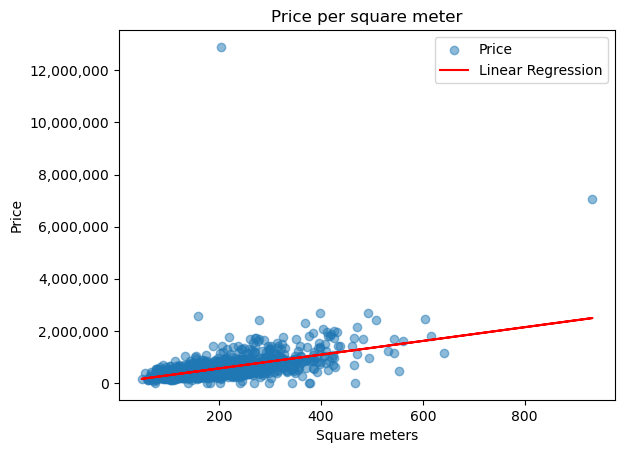

In [28]:
fig, ax = plt.subplots()


ax.scatter(test['sq_meter'], test['price'], alpha=0.5, label='Price')
ax.plot(test['sq_meter'], test['price_predicted'], color='red', label='Linear Regression')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('Price per square meter')
plt.xlabel('Square meters')
plt.ylabel('Price')

plt.legend()
plt.show()